<a href="https://colab.research.google.com/github/seismosmsr/hawaii_soils/blob/main/Hawaii_Soils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# install.packages('sf')
# install.packages('raster')
# install.packages('exactextractr')
# install.packages("googledrive")
# install.packages("googletoken")
# install.packages("DBI")
# install.packages("RSQLite")
# install.packages("RPostgreSQL")
# install.packages("terra")
# install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [36]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=d0e5d57f499ae6ba7bcf69cc72064201&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWRldTVCVlNpMW0taWNxN1FJc3BrZUNLUFRPMnZhaDduQkZ2ZDNhX0xhbDFrNl82bEU3ZldlcU0wYjMxSkdqWHd6SjVoZyIsInN0YXRlIjoiZDBlNWQ1N2Y0OTlhZTZiYTdiY2Y2OWNjNzIwNjQyMDEifQ==


In [4]:
dir.create('/content/predictor_variables/')

In [5]:
# Hawaii GEDI data
# https://drive.google.com/file/d/1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy/view?usp=drive_link
drive_download(file = as_id('1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy'), path =  '/content/predictor_variables/Hawaii_GEDI_4A.gpkg', overwrite = FALSE)

File downloaded:

• Hawaii_GEDI.gpkg <id: 1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy>

Saved locally as:

• /content/predictor_variables/Hawaii_GEDI_4A.gpkg



In [6]:
folder_loc <- '/content/predictor_variables/TerraClimate/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1bIbwKYmzP2o6VEAWyLIRmeMQbGFDt-vX?usp=drive_link
folder_id <- "1bIbwKYmzP2o6VEAWyLIRmeMQbGFDt-vX"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}


File downloaded:

• Maui_Mean_Climate_1958_to_2023.tif <id: 1Aglg9-srq187HYR38PFBVrodg3PpcqbE>

Saved locally as:

• /content/predictor_variables/TerraClimate/Maui_Mean_Climate_1958_to_2023.tif

File downloaded:

• Lanai_Mean_Climate_1958_to_2023.tif <id: 1eFkEW2ZRWtMK-IMEpVJ28R3xups_HhOT>

Saved locally as:

• /content/predictor_variables/TerraClimate/Lanai_Mean_Climate_1958_to_2023.tif

File downloaded:

• Molokai_Mean_Climate_1958_to_2023.tif <id: 18SNFZ6VefxYbEEtWl1nXDj8JJFLdFDo_>

Saved locally as:

• /content/predictor_variables/TerraClimate/Molokai_Mean_Climate_1958_to_2023.tif

File downloaded:

• Hawaii_Mean_Climate_1958_to_2023.tif <id: 1pMs5OsTwQ1N3kXO9bb3W-qfhxwcJtzIj>

Saved locally as:

• /content/predictor_variables/TerraClimate/Hawaii_Mean_Climate_1958_to_2023.tif

File downloaded:

• Kauai_Mean_Climate_1958_to_2023.tif <id: 14bpiZID-VOQmsEVeQc9gFHe8JYK7w_ew>

Saved locally as:

• /content/predictor_variables/TerraClimate/Kauai_Mean_Climate_1958_to_2023.tif

File downlo

In [7]:
folder_loc <- '/content/predictor_variables/SRTM_mTPI/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1YKJrZXTo-L4UpvJ0iEGo8yIX6uhoQ9AW?usp=drive_link
folder_id <- "1YKJrZXTo-L4UpvJ0iEGo8yIX6uhoQ9AW"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Kauai_SRTM_mTPI_Buffer.tif <id: 1APv2WFDHdAiwOhBcAw8db-b1NSIlsK1K>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Kauai_SRTM_mTPI_Buffer.tif

File downloaded:

• Oahu_SRTM_mTPI_Buffer.tif <id: 1MJEjAuHBeDmvfU_7W4j6RZJk6uLD4TE_>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Oahu_SRTM_mTPI_Buffer.tif

File downloaded:

• Maui_SRTM_mTPI_Buffer.tif <id: 1MsRCpuNGuIKInYotrbJ5S-Sagion0wJo>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Maui_SRTM_mTPI_Buffer.tif

File downloaded:

• Molakai_SRTM_mTPI_Buffer.tif <id: 1WRDZse9NGahMQ4h22bxvsv4XFp10JJZW>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Molakai_SRTM_mTPI_Buffer.tif

File downloaded:

• Hawaii_SRTM_mTPI_Buffer.tif <id: 1Qej-icN4NhaYZ8fhhc4bkVXZuD385sl3>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Hawaii_SRTM_mTPI_Buffer.tif

File downloaded:

• Lanai_SRTM_mTPI_Buffer.tif <id: 1sz3x9fZufpjbtrIpY3ZovhNknmDmkR5n>

Saved locally as:

• /content/

In [8]:
folder_loc <- '/content/predictor_variables/Elevation/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1XmH9T9xVINZZfPFi39Wus1l7c0SKS4Am?usp=drive_link
folder_id <- "1XmH9T9xVINZZfPFi39Wus1l7c0SKS4Am"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Kauai_elevation.tif <id: 1SNmoJcKsyKSlG5DVye0c1pHvgWEQ5f1r>

Saved locally as:

• /content/predictor_variables/Elevation/Kauai_elevation.tif

File downloaded:

• Oahu_elevation-0000000000-0000046592.tif
  <id: 1yRDrfvLTEGECTDQcwXRIxoHmUu3D9LL4>

Saved locally as:

• /content/predictor_variables/Elevation/Oahu_elevation-0000000000-0000046592.tif

File downloaded:

• Maui_elevation.tif <id: 1Or-pj4QiOj8VgMOAPtVjMm_ocbrvGM6_>

Saved locally as:

• /content/predictor_variables/Elevation/Maui_elevation.tif

File downloaded:

• Molokai_elevation.tif <id: 1ae2lpPQngdFx58mRpqt02Z1bQg-Tifen>

Saved locally as:

• /content/predictor_variables/Elevation/Molokai_elevation.tif

File downloaded:

• Niihau_elevation.tif <id: 1L6lodPtr7u70scb-gu_QliaAIyEwYAtc>

Saved locally as:

• /content/predictor_variables/Elevation/Niihau_elevation.tif

File downloaded:

• Oahu_elevation-0000000000-0000000000.tif
  <id: 1YMV_pXPQjmdam7ucBItWqzFJPPYQK7H5>

Saved locally as:

• /content/predicto

In [9]:
folder_loc <- '/content/predictor_variables/LandForms/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1PkUR4GK50wC6Kgrvyy-d6067ypdX1dkx?usp=drive_link
folder_id <- "1PkUR4GK50wC6Kgrvyy-d6067ypdX1dkx"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Molakai_Landforms_Buffer.tif <id: 1ZBdccF_ELdIApV0SkAv2ZfWsZ0a0ae1f>

Saved locally as:

• /content/predictor_variables/LandForms/Molakai_Landforms_Buffer.tif

File downloaded:

• Lanai_Landforms_Buffer.tif <id: 1LU4LHzgkHHCmdOfWccniRJ8d0225AFu1>

Saved locally as:

• /content/predictor_variables/LandForms/Lanai_Landforms_Buffer.tif

File downloaded:

• Landforms_Buffer_2000m.tif <id: 1HMIkKM_02cVNWaB7-IYwnd414Wg5acnK>

Saved locally as:

• /content/predictor_variables/LandForms/Landforms_Buffer_2000m.tif

File downloaded:

• Hawaii_Landforms_Buffer.tif <id: 1qBNjiXKd-JJ8CICZvVTo42kkKjBNhYMT>

Saved locally as:

• /content/predictor_variables/LandForms/Hawaii_Landforms_Buffer.tif

File downloaded:

• Kauai_Landforms_Buffer.tif <id: 1oRmeE1kg5GswFcDdUaGU5jnui9Y2DpR3>

Saved locally as:

• /content/predictor_variables/LandForms/Kauai_Landforms_Buffer.tif

File downloaded:

• Oahu_Landforms_Buffer-0000000000-0000065536.tif
  <id: 1PcZoQe0l8WLgSagiWWUpTmWmmHmGnIRx>

Sav

In [10]:
folder_loc <- '/content/predictor_variables/LandSat_composite/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1NzvurSghdEJdX0UsfdyuOcOyh6n3jUDo?usp=drive_link
folder_id <- "1NzvurSghdEJdX0UsfdyuOcOyh6n3jUDo"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Niihau_LS_composite_2012_2018.tif <id: 1yphCVOxcRgBOKdhvOOQunCnObkHhPWWx>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Niihau_LS_composite_2012_2018.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000000000-0000035840.tif
  <id: 1Tyc-6B7SqE1nMRBDbSzNP9KvoItaogpC>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Oahu_LS_composite_2012_2018-0000000000-0000035840.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000008960-0000026880.tif
  <id: 1yaE46GTtCsjXAhqK43HzMHgfMicRjMnK>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Oahu_LS_composite_2012_2018-0000008960-0000026880.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000008960-0000035840.tif
  <id: 1sxPsCuwNjHyfO2Sxit0jVfG_jai9IJWR>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Oahu_LS_composite_2012_2018-0000008960-0000035840.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000008960-0000071680.tif
  <id: 1

In [11]:
folder_loc <- '/content/predictor_variables/DynamicWorld_landcover/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/152pjTArpwlDVGjXFoSU9bmo1BDSKdCqq?usp=drive_link
folder_id <- "152pjTArpwlDVGjXFoSU9bmo1BDSKdCqq"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000000000-0000074240.tif
  <id: 1Tnsd4PZQSPdEbdX3VtH-_doNBWuyWMtl>

Saved locally as:

• /content/predictor_variables/DynamicWorld_landcover/Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000000000-0000074240.tif

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000000000-0000185600.tif
  <id: 19DtTLjlI_AVs4xBGyW5wjulRZljoOCC9>

Saved locally as:

• /content/predictor_variables/DynamicWorld_landcover/Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000000000-0000185600.tif

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000007424-0000074240.tif
  <id: 1onONrmPMlNMtLjBkensOCDfagUTROlW2>

Saved locally as:

• /content/predictor_variables/DynamicWorld_landcover/Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000007424-0000074240.tif

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000007424-0000089088.tif
  <id: 1K3KKn6GQhq1RKZaXwqaxCtl41QacT

In [23]:
  # https://drive.google.com/file/d/1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv/view?usp=drive_link
drive_download(as_id('1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv'), path = paste0('/content/fia.gpkg'), overwrite = TRUE)
fia_dt <-  st_read('/content/fia.gpkg')

File downloaded:

• Soils_Joined.gpkg <id: 1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv>

Saved locally as:

• /content/fia.gpkg



Reading layer `Soils_Joined' from data source `/content/fia.gpkg' using driver `GPKG'
Simple feature collection with 750 features and 197 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -159.7567 ymin: 19.02513 xmax: -154.8152 ymax: 22.18564
Geodetic CRS:  WGS 84


In [13]:
dir_list <- list.dirs('/content/predictor_variables')[-1]

names(dir_list) <- list.dirs('/content/predictor_variables',full.names = FALSE)[-1]

In [14]:
names(dir_list) %>% lapply(function(x){
  print(x)
 y <- dir_list[[x]]
 vrt(y %>% lapply(function(x){list.files(y, pattern='*.tif',full.names = T)}) %>%unlist,filename=paste0(y,'/',x,'.vrt'),overwrite=T)
 print(paste('Done',x))
})

[1] "DynamicWorld_landcover"
[1] "Done DynamicWorld_landcover"
[1] "Elevation"
[1] "Done Elevation"
[1] "LandForms"
[1] "Done LandForms"
[1] "LandSat_composite"
[1] "Done LandSat_composite"
[1] "SRTM_mTPI"
[1] "Done SRTM_mTPI"
[1] "TerraClimate"
[1] "Done TerraClimate"


[[1]]
[1] "Done DynamicWorld_landcover"

[[2]]
[1] "Done Elevation"

[[3]]
[1] "Done LandForms"

[[4]]
[1] "Done LandSat_composite"

[[5]]
[1] "Done SRTM_mTPI"

[[6]]
[1] "Done TerraClimate"

In [15]:
 raster_list <- list.files('/content/predictor_variables',pattern = '*.vrt',full.names = T,recursive = T) %>% lapply(stack)

raster_list
  # # Use gdalbuildvrt to create VRT
  # gdalbuildvrt(destfile = paste0(x,'/',x,'.vrt'),
  #              files =   (x %>% lapply(function(x){list.files(x, pattern='*.tif',full.names = T)})),
  #              separate = FALSE, # Change to TRUE if you want separate bands
  #              overwrite = TRUE)




[[1]]
class      : RasterStack 
dimensions : 371582, 2203446, 818760871572, 10  (nrow, ncol, ncell, nlayers)
resolution : 9.037928e-05, 9.037928e-05  (x, y)
extent     : -178.4436, 20.70227, 18.86545, 52.44877  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : DynamicWorld_landcover_1, DynamicWorld_landcover_2, DynamicWorld_landcover_3, DynamicWorld_landcover_4, DynamicWorld_landcover_5, DynamicWorld_landcover_6, DynamicWorld_landcover_7, DynamicWorld_landcover_8, DynamicWorld_landcover_9, DynamicWorld_landcover_10 


[[2]]
class      : RasterStack 
dimensions : 35816, 87898, 3148154768, 1  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -178.4436, -154.7556, 18.8652, 28.51742  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Elevation 


[[3]]
class      : RasterStack 
dimensions : 80530, 270460, 21780143800, 1  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 

In [16]:
gedi_dt <- st_read('/content/predictor_variables/Hawaii_GEDI_4A.gpkg') %>% data.table()

Reading layer `Hawaii_GEDI_2' from data source 
  `/content/predictor_variables/Hawaii_GEDI_4A.gpkg' using driver `GPKG'
Integer64 values larger than 9.0072e+15 lost significance after conversion to double;
use argument int64_as_string = TRUE to import them lossless, as character
Simple feature collection with 4839466 features and 28 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -160.6006 ymin: 18.86556 xmax: -154.7559 ymax: 22.28996
Geodetic CRS:  WGS 84


Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 99 rows containing non-finite values (`stat_bin()`).”


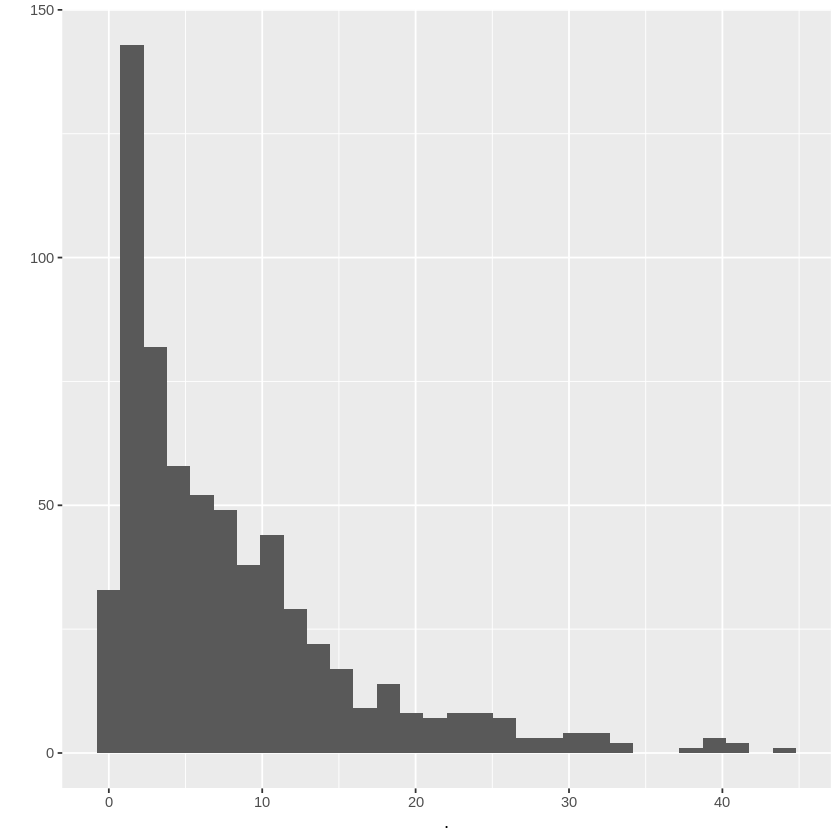

In [27]:
fia_dt[,c('C_TOTAL_PCT','geom')]$C_TOTAL_PCT %>% qplot

In [70]:
example_poly <- fia_dt[,c('C_TOTAL_PCT','geom')] %>% st_as_sf() %>% st_transform(4135) %>% st_buffer(10) %>% st_transform(4326) %>% data.table

In [71]:
rf_dt <- data.table(example_poly,exact_extract(raster_list[[6]],example_poly %>% st_as_sf,'mean') %>% data.table)

  |======================================================================| 100%


In [72]:
names(rf_dt)[-c(1,2)] <- c("aet", "def", "pdsi", "pet", "pr", "ro", "soil", "srad", "swe", "tmmn", "tmmx", "vap", "vpd", "vs")


In [73]:
rf_form <- as.formula(paste0('C_TOTAL_PCT~',paste((rf_dt %>% names)[-c(1,2)],collapse = '+')))
rf_form

C_TOTAL_PCT ~ aet + def + pdsi + pet + pr + ro + soil + srad + 
    swe + tmmn + tmmx + vap + vpd + vs


Call:
 randomForest(formula = rf_form, data = rf_dt[complete.cases(rf_dt[,      -2]), ], verbose = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 28.33177
                    % Var explained: 56.16

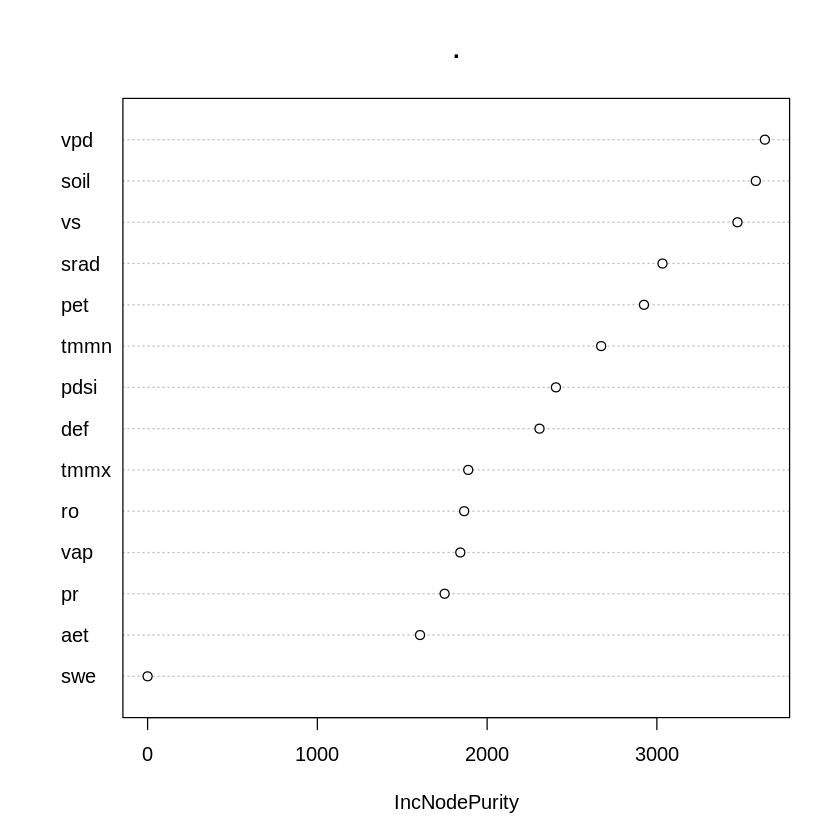

In [83]:
rf_terra <- randomForest(rf_form,rf_dt[complete.cases(rf_dt[,-2]),],verbose=T)
rf_terra %>% varImpPlot
rf_terra

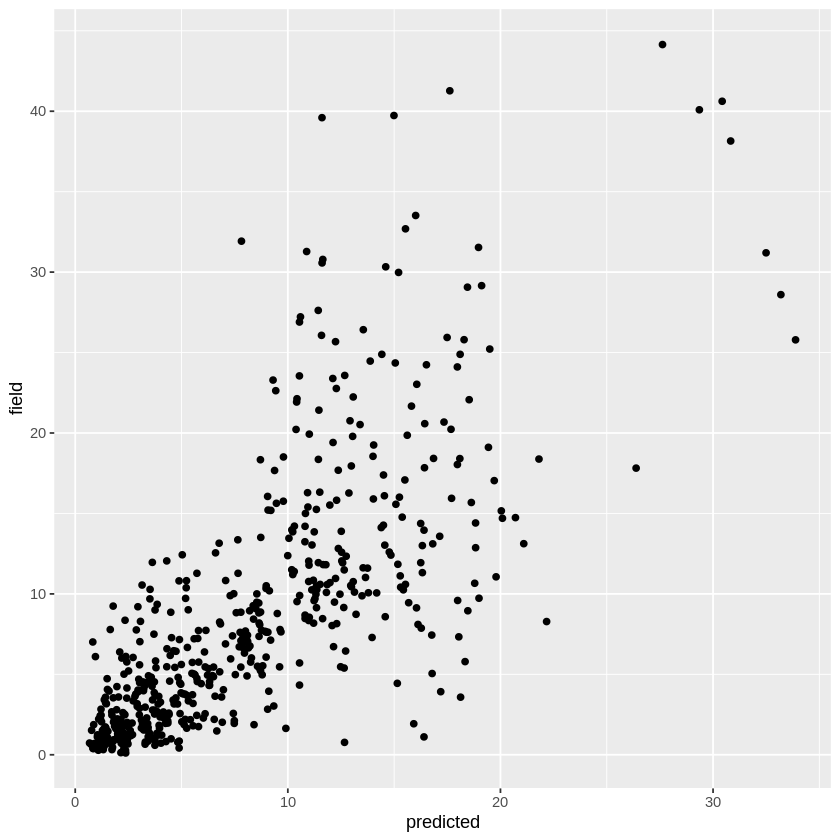

In [84]:
data.frame(field = rf_terra$y,predicted = rf_terra$predicted) %>%
  ggplot(aes(x=predicted,y=field))+
  geom_point()